# The Spark Foundation- Data Science & Business Analytics Internship

# Name: Amogh Rajiv Johari

# Task 1: Prediction using Supervised ML:- Predict the percentage of a student based on the no. of study hours.


In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
get_ipython().run_line_magic('matplotlib', 'inline')

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
#Shape
data.shape

(25, 2)

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


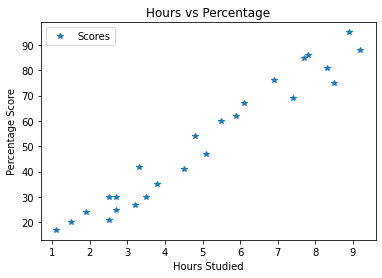

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(xtrain, ytrain) 

print("Training complete.")

Training complete.


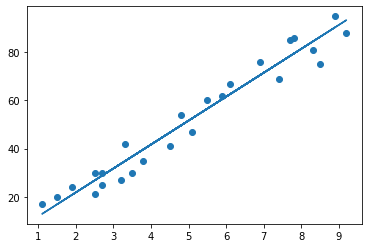

In [13]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [14]:
print(xtest) # Testing data - In Hours
ypred = regressor.predict(xtest) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred})  
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [16]:
# You can also test with your own data
hours = [9.25]
pred = regressor.predict([hours])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

Number of Hours = [9.25]
Predicted Score = 93.89272889341652


In [17]:
from sklearn import metrics  
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred)) 
print('r2 score Error:',r2_score(ytest, ypred))
print('Mean Squared Error: ',mean_squared_error(ytest, ypred))

Mean Absolute Error: 4.130879918502482
r2 score Error: 0.9367661043365056
Mean Squared Error:  20.33292367497996
